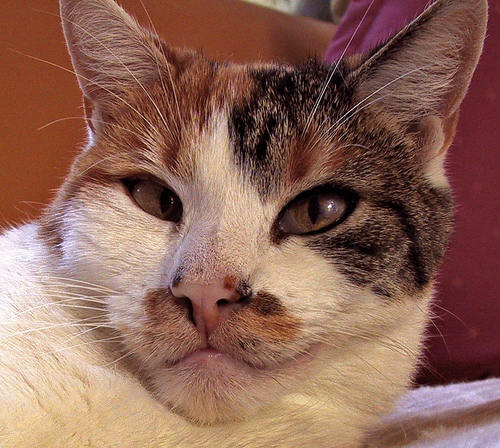

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


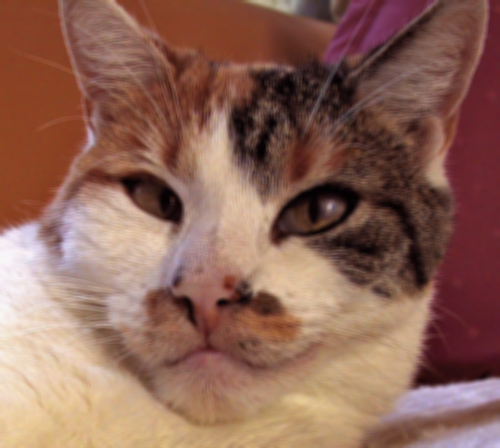

In [ ]:
# memanggil modul yang diperlukan
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.filters import threshold_otsu
from google.colab.patches import cv2_imshow

#bgr
img = cv2.imread('kucing4.jpg')

#rgb
cat = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# tampilkan gambar awal tanpa filter
cv2_imshow(img)


# membuat filter: matriks berukuran 5 x 5
kernel = np.ones((5,5),np.float32)/25
print(kernel)

# lakukan filtering
kucing_filter = cv2.filter2D(img,-1,kernel)
cv2_imshow(kucing_filter)

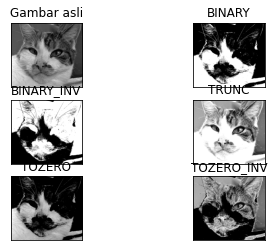

In [ ]:
# membaca gambar baymax
img = cv2.imread('kucing4.jpg',0)

# Hitungan threshold.
# Perhatikan nilai ambang batas bawah dan atas dari tiap fungsi
# yang diberikan
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

# menampilkan hasil
titles = ['Gambar asli','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

# menampilkan beberapa gambar sekaligus
for i in range(6):
    # 3 baris, 2 kolom
    plt.subplot(3,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


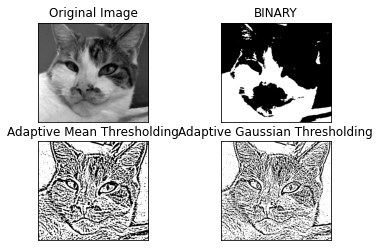

In [ ]:
# masih menggunakan variabel img yang sama
#img = cv2.imread('kucing.jpg',0)

# digunakan median blur untuk menghaluskan tepi objek pada citra
# ini diperlukan agar thresholding memberikan hasil lebih baik
img = cv2.medianBlur(img,5)

# Lakukan Thresholding
# Binary Threshold
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Adaptive Threshold dengan Mean
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)

# Adaptive Threshold dengan Gaussian
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)


# Plotting
titles = ['Original Image', 'BINARY',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

# menampilkan hasil
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


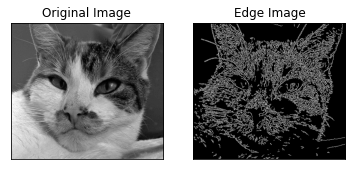

In [ ]:
img = cv2.imread('kucing4.jpg',0)

# deteksi tepi dengan Canny Edge
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

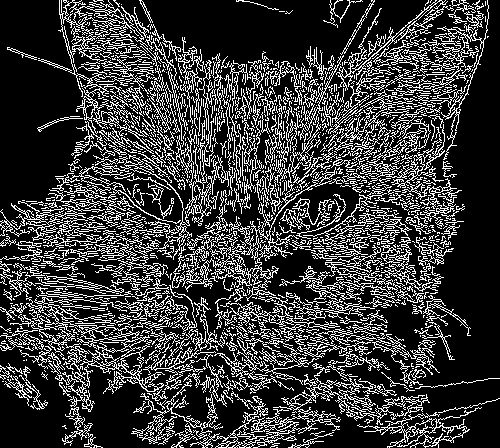

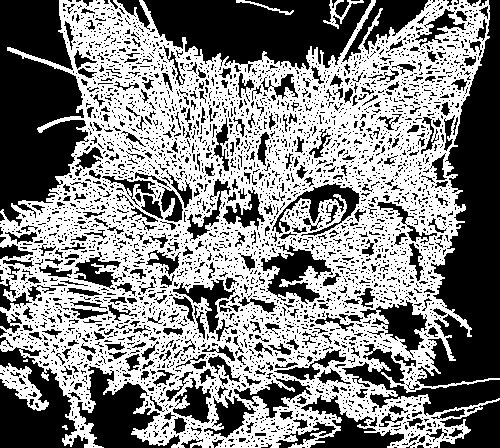

-1

In [ ]:
edged=cv2.Canny(img, 30,200)

kernel = np.ones((2,2), np.uint8)

edged1 = cv2.dilate(edged, kernel, iterations=1)
cv2_imshow(edged)
cv2_imshow(edged1)
cv2.waitKey(0)

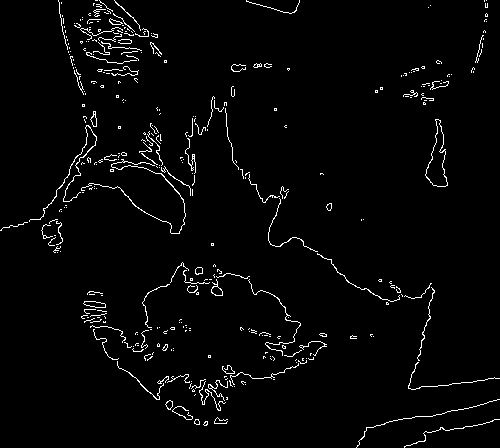

Jumlah kontur yang berhasil dideteksi = 356


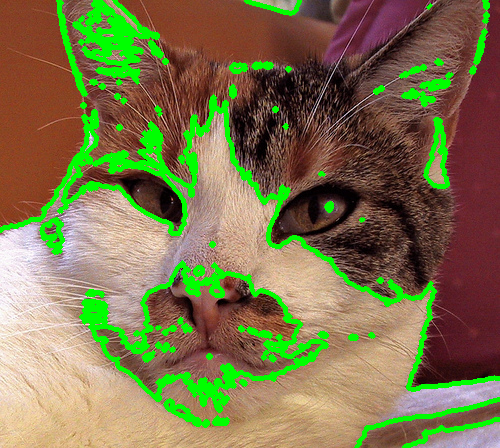

In [ ]:
# gambar berwarna untuk diplot
img_ori = cv2.imread('kucing4.jpg')

# grayscale untuk diolah
img = cv2.imread('kucing4.jpg',0)

# Menerapkan Gaussian filtering sebelum Otsu’s thresholding
blur = cv2.GaussianBlur(img,(5,5),0)

# Otsu
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Menggunakan Canny Edge untuk deteksi tepi
edged = cv2.Canny(th3, 30, 200)

# mencari kontur
contours, hierarchy = cv2.findContours(edged,
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

cv2_imshow(edged)

print("Jumlah kontur yang berhasil dideteksi = " + str(len(contours)))

# Gambar kontur yang dideteksi
# -1 artinya gambar semua kontur yang ditemukan
cv2.drawContours(img_ori, contours, -1, (0, 255, 0), 3)

cv2_imshow(img_ori)
